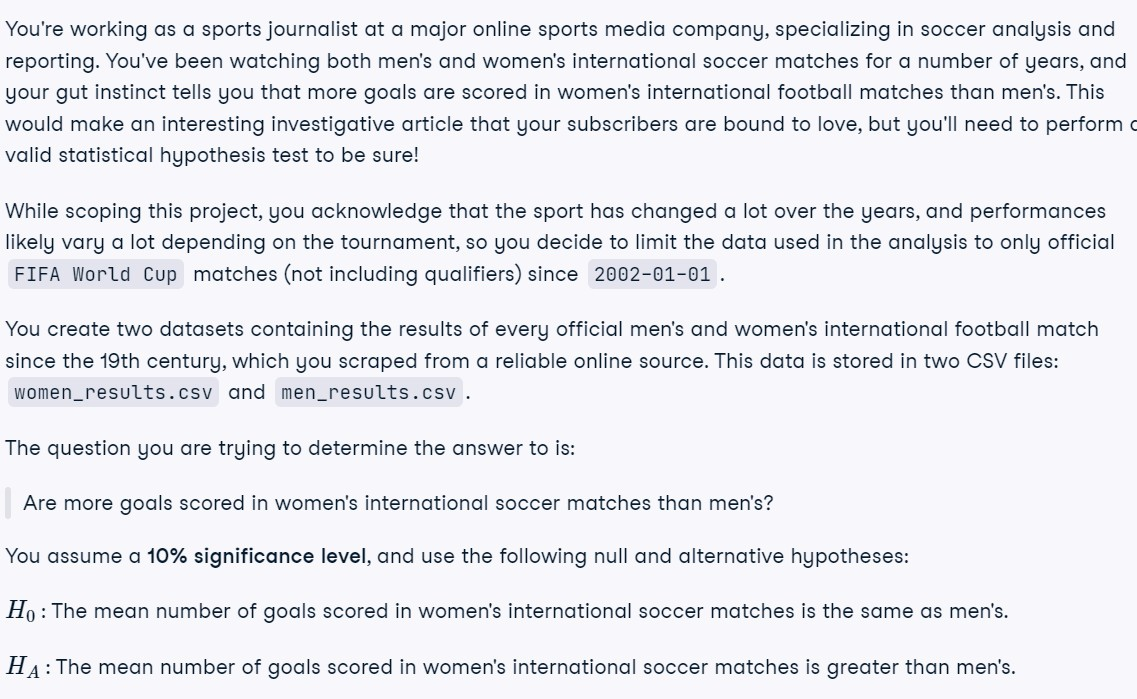

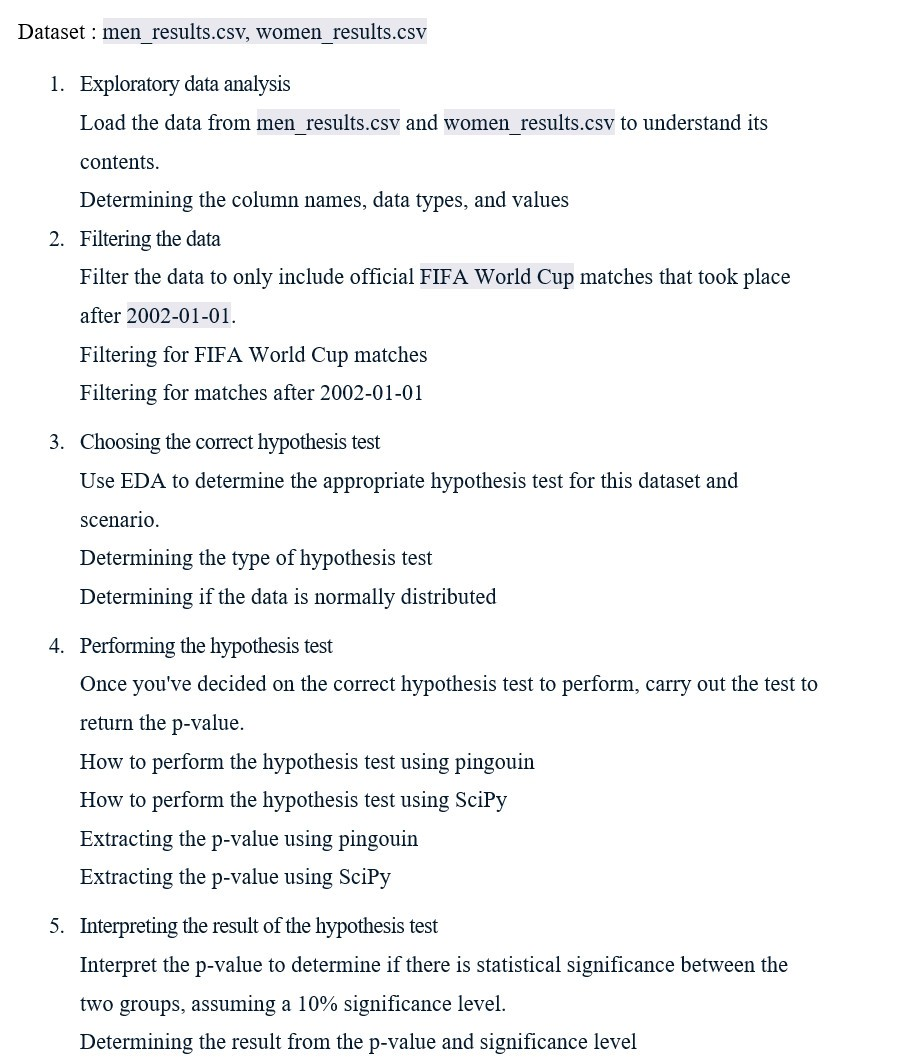

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin
from scipy.stats import mannwhitneyu



In [2]:
# Cau 1.
men_results = pd.read_csv('men_results.csv', header=0)
women_results = pd.read_csv('women_results.csv', header=0)

print("Men")
men_results.columns, men_results.info(), men_results.describe()

print("Women")
men_results.columns, men_results.info(), men_results.describe()

Men
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
Women
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtyp

(Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
        'away_score', 'tournament'],
       dtype='object'),
 None,
          Unnamed: 0    home_score    away_score
 count  44353.000000  44353.000000  44353.000000
 mean   22176.000000      1.740559      1.178793
 std    12803.752581      1.748722      1.394580
 min        0.000000      0.000000      0.000000
 25%    11088.000000      1.000000      0.000000
 50%    22176.000000      1.000000      1.000000
 75%    33264.000000      2.000000      2.000000
 max    44352.000000     31.000000     21.000000)

In [3]:
# Cau 2:
men_results_Fifa = men_results[(men_results['tournament'] == 'FIFA World Cup') & (men_results['date'] > "2002-01-01")].reset_index()
print("Men")
print(men_results_Fifa.head(5))
women_results_Fifa = women_results[(women_results['tournament'] == 'FIFA World Cup') & (women_results['date'] > "2002-01-01")].reset_index()
print("Women")
print(women_results_Fifa.head(5))


Men
   index  Unnamed: 0        date            home_team     away_team  \
0  25164       25164  2002-05-31               France       Senegal   
1  25165       25165  2002-06-01              Germany  Saudi Arabia   
2  25166       25166  2002-06-01  Republic of Ireland      Cameroon   
3  25167       25167  2002-06-01              Uruguay       Denmark   
4  25168       25168  2002-06-02            Argentina       Nigeria   

   home_score  away_score      tournament  
0           0           1  FIFA World Cup  
1           8           0  FIFA World Cup  
2           1           1  FIFA World Cup  
3           1           2  FIFA World Cup  
4           1           0  FIFA World Cup  
Women
   index  Unnamed: 0        date      home_team    away_team  home_score  \
0   1600        1600  2003-09-20        Nigeria  North Korea           0   
1   1601        1601  2003-09-20         Norway       France           2   
2   1602        1602  2003-09-20        Germany       Canada           

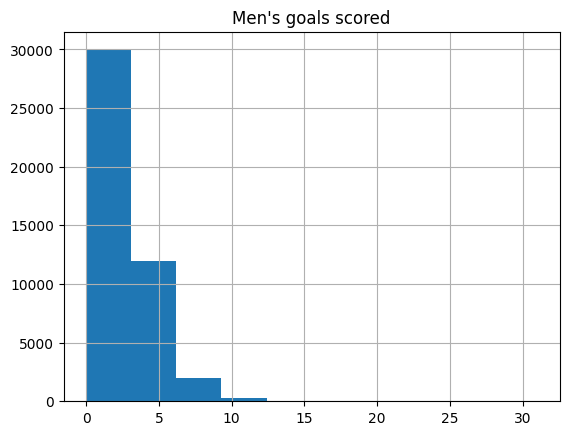

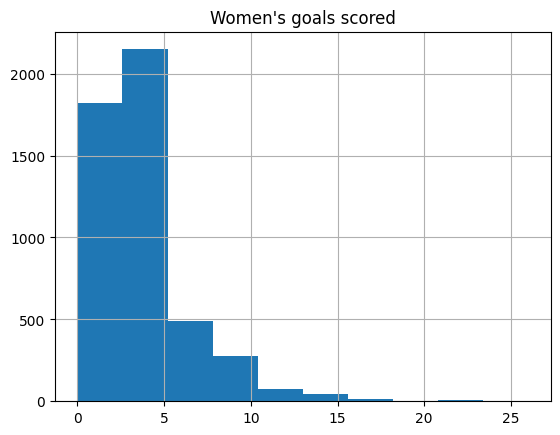

<Figure size 640x480 with 0 Axes>

In [4]:
# Create group and goals_scored columns
men_results['group'] = 'men'
women_results['group'] = 'women'

men_results['goals_scored'] = men_results["home_score"] + men_results["away_score"]
women_results['goals_scored'] = women_results["home_score"] + women_results["away_score"]


# Determine normality using histograms 
men_results["goals_scored"].hist() 
plt.title("Men's goals scored")
plt.show() 
plt.clf() 

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups 
women_results["goals_scored"].hist() 
plt.title("Women's goals scored")
plt.show() 
plt.clf() 


### Cau 4:

In [5]:

# Combine women's and men's data and calculate goals scored in each match 
both = pd.concat([women_results, men_results], axis=0, ignore_index=True) 
 
# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test 
both_subset = both[["goals_scored", "group"]] 
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored") 
 
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin 
results_pg = pingouin.mwu(x=both_subset_wide["women"], 
                          y=both_subset_wide["men"], 
                          alternative="greater") 

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_results["goals_scored"], 
                             y=men_results["goals_scored"], 
                             alternative="greater")



### Cau 5


In [6]:
# Extract p-value as a float 
p_val = results_pg["p-val"].values[0] 
print(p_val)
 
# Determine hypothesis test result using sig. level 
if p_val <= 0.01: 
    result = "reject" 
else: 
    result = "fail to reject" 
 
result_dict = {"p_val": p_val, "result": result} 
print(result_dict)

1.9977650531428883e-75
{'p_val': 1.9977650531428883e-75, 'result': 'reject'}
